# The Relationship Between GDP and Life Expectancy

### Table of Contents

* [Goals](#goals)
* [Scoping](#scoping)
* [Data](#data)
* [Time Series Analysis](#tsa)
    - [Life Expectancy](#le)
    - [GDP](#gdp)
    - [Average GDP vs Life Expectancy](#gdp-le)
* [Time Series Multivariate Analysis](#ts-ma)
    - [Zimbabwe](#zimbabwe)
    - [Medium GDP Countries](#mediumgdp)
    - [High GDP Countries](#highgdp)
* [Exploratory Data Analysis: Correlation](#eda:corr)
* [Discussion](#discussion) 

<a id="goals"></a>
## Project Goals

The main goal of the current project will be to analyze data on GDP and life expectancy from the World Health Organization and the World Bank, in order to identify the **relationship between GDP and Life Expectancy** of six countries.

To this end, the data will be analysed, prepared, and visualised in order to answer this question in a meaningful way.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import csv
import statsmodels.api as sm
import math
import statsmodels

<a id="scoping"></a>
## Project Scoping

With the goal of identifying the relationship between a country's GDP and its population's life expectancy, the following analytical sets will be required, in order: 

1. Univariate Analysis of each countries life expectancy (different parts of the population will have different expectancies) and GDP - in order to observe how they evolved accross the time span seen in the data (time series analysis)

2. Bivariate Analysis between the average GDP and Life Expectancy for each year of the dataset - What tipe of relationship (if any) is there between the two overall?

3. Bivariate Analysis of the relationship between each country's GDP and Life Expectancy - How do the two change, comparatively to each other? Does there seem to be a relationship between the two, in each country specifically?

4. Multivariate Analysis of the 6 country's GDP and life expectancy. Observing the relationship between these two measures for each country, is there any other insight revealed?

5. Pearson's Correlation. This will allow us to gain a deeper understanding of the relationship between the two variables.

### Hypothesis for the EDA:

1. Countries with a higher GDP will tend to have a higher life expectancy.

2. Life expectancy will tend to grow over time in all countries

3. GDP will tend to grow over time for all countries. No reduction in GDP is expected for any of the countries present in the dataset. 

Finally, with relation to the relationship between the two measures (GDP and Life Expectancy), a significant poisitve relationship is expected, although, it might be more difficult to understand the direction of said relationship. Not only this, but, although significant and positive, it might well be the case that there isn't a strong correlation between the two, due to the complexity of each specific country's economic, health and societal situations rarely allowing for this sort of relationship between two single measures.

<a id="data"></a>
# Data

Before analysing the data, an examination of its structure, columns, number of datapoints, missing data and summary statistics will be run, to give us a better insight into the dataset.

In [18]:
data = pd.read_csv('/kaggle/input/codecademy-portfolio-2-data/all_data.csv')
print(data.head(-20))
print(data.info())
print(data.Country.unique())
print(data.describe())

                     Country  Year  Life expectancy at birth (years)  \
0                      Chile  2000                              77.3   
1                      Chile  2001                              77.3   
2                      Chile  2002                              77.8   
3                      Chile  2003                              77.9   
4                      Chile  2004                              78.0   
..                       ...   ...                               ...   
71  United States of America  2007                              78.1   
72  United States of America  2008                              78.2   
73  United States of America  2009                              78.5   
74  United States of America  2010                              78.7   
75  United States of America  2011                              78.7   

             GDP  
0   7.786093e+10  
1   7.097992e+10  
2   6.973681e+10  
3   7.564346e+10  
4   9.921039e+10  
..           ...  
71

The column "Country" seems to be comprised of the countries: 
'Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe'.
As such, these will be the countries examined in the report.

There are no Null values in the data and we have a total of 96 entries. Furthermore, the data was collected between the year 2000 and 2015.

Across this life span, the minimum Life Expectancy for a country was 44 years, and the maximum was 81. In terms of GDP, the lowest amount was that of 441 Million Dollars, whereas the maximum is equal to 1.81 Trillion. From this, one can expect to find a very wide range of variation between these 6 countries, in both measures.

For the next step in the current report, a Time Series analysis will be conducted to explore the evolution of the two measures accross the time-span in the dataset.

<a id="tsa"></a>
## Exploratory Data Analysis: Time Series Analysis

<a id="le"></a>
### Life Expectancy

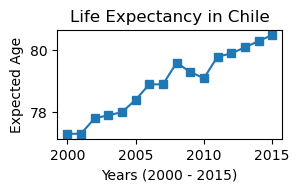

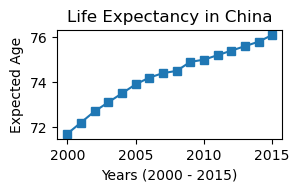

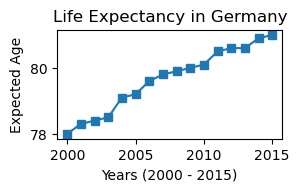

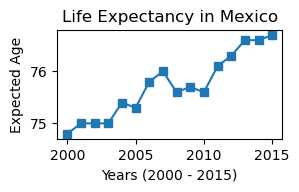

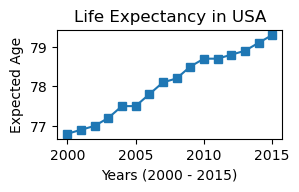

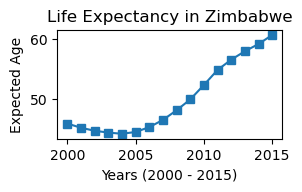

In [19]:
data_copy = data.rename(columns = {"Life expectancy at birth (years)":
                                   "Life_expectancy"})
data_copy.replace("United States of America", "USA", inplace = True)
years = data_copy.Year[0:16]

for i, country in enumerate(data_copy.Country.unique()):
    # Life Expectancy in Chile
    ax = plt.subplot(3,2,i+1)
    plt.plot(years, data_copy.Life_expectancy[data_copy.Country==country],
         marker = 's')
    plt.title("Life Expectancy in " + country)
    plt.xlabel("Years (2000 - 2015)")
    plt.ylabel("Expected Age")
    plt.show()

It seems that, although with some variation accross time, all 6 countries have seen a positive growth in their population's Life Expectancy. This wasn't true through all the years in the dataset however, as every country - except perhaps China - saw a period of either a decrease or stagnation. However, overall, there seems to be a trend towards growth. 

<a id="gdp"></a>
### GDP

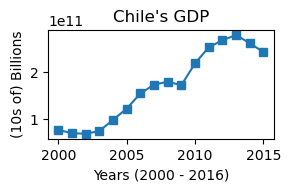

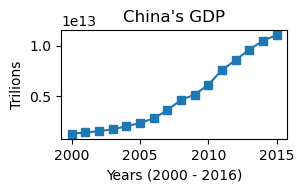

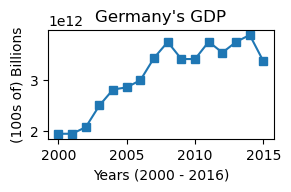

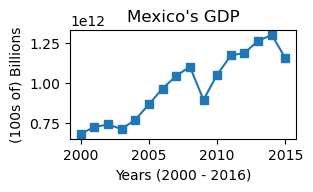

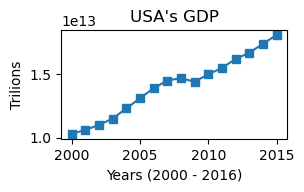

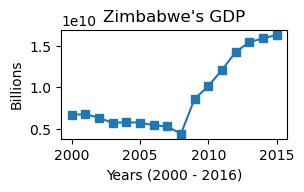

In [5]:
for i, country in enumerate(data_copy.Country.unique()):
    # Life Expectancy in Chile
    ax = plt.subplot(3,2,i+1)
    plt.plot(years, data_copy.GDP[data_copy.Country==country],
         marker = 's')
    plt.title(country + "'s GDP")
    plt.xlabel("Years (2000 - 2016)")
    if country == "Zimbabwe":
        plt.ylabel("Billions")
    elif (country == "USA") or (country == "China"):
        plt.ylabel("Trilions")
    elif country == "Chile":
        plt.ylabel("(10s of) Billions")
    else:
        plt.ylabel("(100s of) Billions")
    plt.show()

Through the above visualisations, one can observe how, although the trend is once again growth, this isn't as clear as with Life Expectancy. Specifically, Germany, Chile and Mexico have seen their GDP stagnate or reduce in the final years of the dataset, whereas USA, China and Zimbabwe have seen growth in recent years, although Zimbabwe's was reducing accross time until around 2008.

**From both of these visualisations, a positive trend can be identified on the two measures. As such, the next step in the analysis would be to explore how the two match up to each other year-on-year, in an effort to explore their relationship.**

<a id="gdp-le"></a>
### Time Series Analysis: Average Life Span & GDP

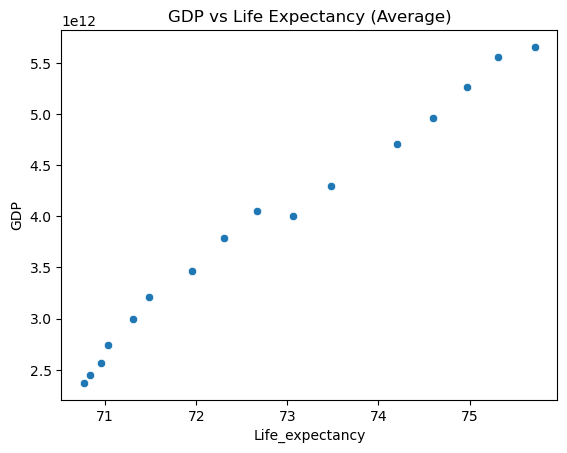

In [20]:
# obtaining Series of the average of two measures accross all years
average_GDP = data_copy.GDP.groupby(data_copy.Year).mean()
average_life_span = data_copy.Life_expectancy.groupby(data_copy.Year).mean()

# plotting both in a scatter plot
sns.scatterplot(x = average_life_span, y = average_GDP)
plt.title("GDP vs Life Expectancy (Average)")
plt.show()

As can be seen, the relationship between these two measures seems to be linear, with the two measures growing together. Of course, finding the direction of this relationship might be outside the scope of the current project, but it seems that, as one grows, so does the other.

**In order to better visualise this relationship, the current project will explore how the two measures map onto each other, for each country individually. This might provide us with some more insight, not only in the relationship between the two measures overall, but also in the relationship that exist between countries.**

<a id="ts-ma"></a>
### Time Series - Multivariate Analysis

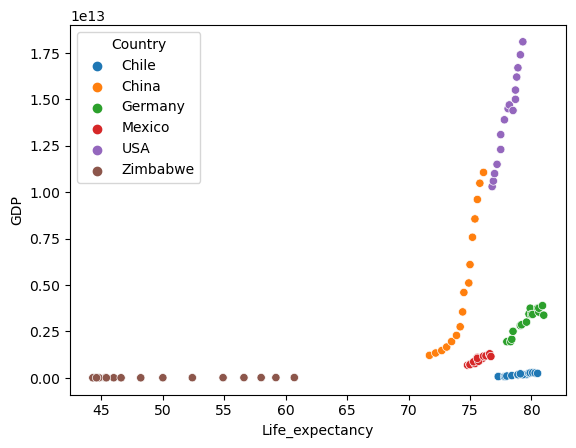

In [7]:
sns.scatterplot(data = data_copy, x = "Life_expectancy", y = "GDP", hue = "Country")
plt.ylim()
plt.show()

The disparity between countriies' GDP and Life Expectancy does not allow us to correctly observe how their individual cases. For example Zimbabwe, due to having a GDP much lower than the USA and China, and a much lower life expectancy than the rest of the countries, does not map well onto the scatter plot. 
Simillarly, Germany, Chile and Mexico, due to having a lower GDP than the other two countries, are hard to visualise, despite having some of the highest Life Expectancies in the dataset.

**As such, I am gonna plot Zimbabwe by itself, Germany, Chile and Mexico together and the USA and China in a separate plot, as their GDP numbers aren't allowing for a good examination.**

<a id="zimbabwe"></a>
#### Zimbabwe

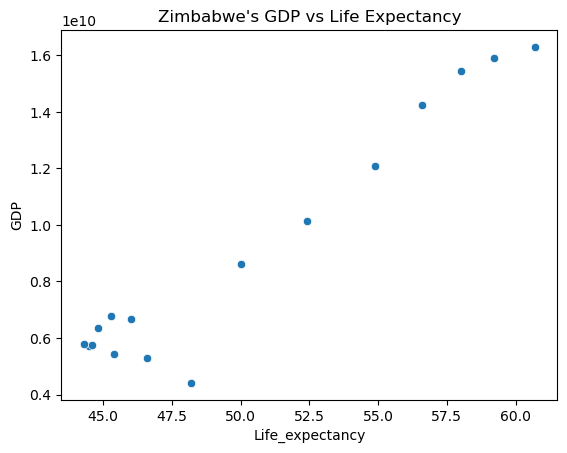

In [17]:
sns.scatterplot(x = data_copy.Life_expectancy[data_copy.Country == "Zimbabwe"], y = data_copy.GDP[data_copy.Country == "Zimbabwe"])
plt.title("Zimbabwe's GDP vs Life Expectancy")
plt.show()

Here, we can see that, although it is not linear in the earlier years of the dataset (Zimbabwe's Life Expectancy actually went down in the early to mid 2000s, whilst their GDP was somewhat stable), it becomes very linear in late 2000s and early/mid 2010s when both measures start to increase consistently.

**Moving on, this relationship will be examined for the three "middle" countries of the dataset.**

<a id="mediumgdp"></a>
#### Medium GDP countries

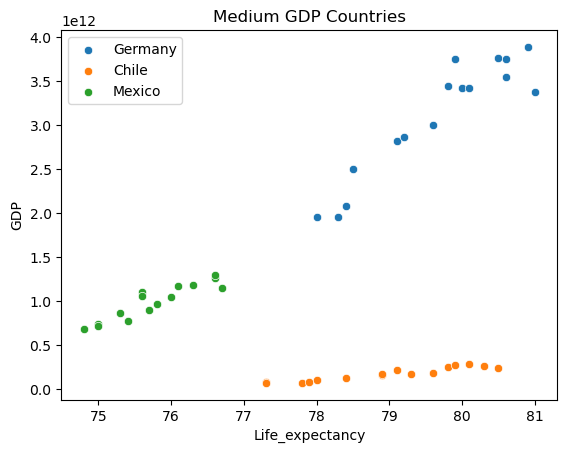

In [16]:
# plotting Germany, Chile and Mexico
sns.scatterplot(x = data_copy.Life_expectancy[data_copy.Country == "Germany"], y = data_copy.GDP[data_copy.Country == "Germany"], label = "Germany")
sns.scatterplot(x = data_copy.Life_expectancy[data_copy.Country == "Chile"], y = data_copy.GDP[data_copy.Country == "Chile"], label = "Chile")
sns.scatterplot(x = data_copy.Life_expectancy[data_copy.Country == "Mexico"], y = data_copy.GDP[data_copy.Country == "Mexico"], label = "Mexico")
plt.legend()
plt.title("Medium GDP Countries")
plt.show()

By plotting it this way, we can now see that each of these relationships is somewhat linear in nature for these three countries as well. Grouping the three countries seems to not be perfect, as Chile seems quite flat, indicating that, due to Germany's GDP being significantly higher, this plot isn't allowing for a full visualisation of the relationship in its case. 
However, this is good enough to reach a good understanding of what this relationship looks like in each of these case-studies.

Finally, let's explore this relationship in High-GDP countries.

<a id="highgdp"></a>
#### High GDP countries

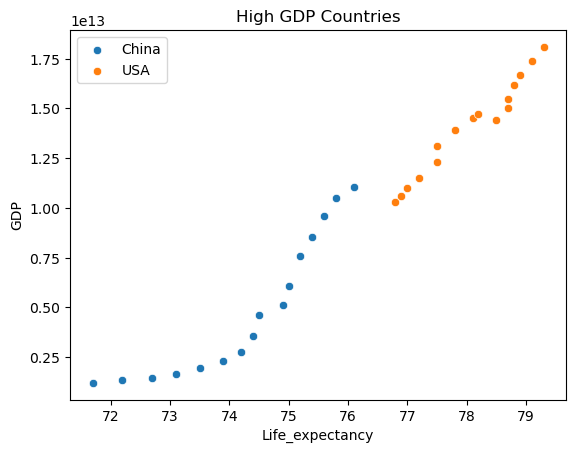

In [15]:
sns.scatterplot(x = data_copy.Life_expectancy[data_copy.Country == "China"], y = data_copy.GDP[data_copy.Country == "China"], label = "China")
sns.scatterplot(x = data_copy.Life_expectancy[data_copy.Country == "USA"], y = data_copy.GDP[data_copy.Country == "USA"], label = "USA")
plt.legend()
plt.title("High GDP Countries")
plt.show()

The USA's Life Expectancy and GDP match almost perfectly in a linear relationship, whereas China's looks more like an exponential relationship rather than linear.

To finalise this exploration of the data, however, a Pearson's correlation between the two will be run, in order to obtain a single measure.

<a id="eda:corr"></a>
### EDA: Correlation

In [11]:
from scipy.stats import pearsonr

corr, p = pearsonr(data_copy.GDP, data_copy.Life_expectancy)
print(corr, p)

0.343206748449156 0.0006187129569469811


According to Pearson's Correlation, there is a positive, significant (p < 0.05), low (r = 0.34), correlation between the two measures.

This step of the analysis indicates that the two measures are correlated, something mostly supported by the scatter plots observed above. 

<a id="discussion"></a>
# Discussion 

The current project set out with the goal to explore the relationship between GDP and Life Expectancy. To this end, the following Hypothesis were defined:

1. Countries with a higher GDP will tend to have a higher life expectancy.

2. Life expectancy will tend to grow over time in all countries

3. GDP will tend to grow over time for all countries. No reduction in GDP is expected for any of the countries present in the dataset. 

Through Data Exploration, we have seen that hypothesis number 1 and 2 have been supported by the data. However, the data does not seem to support Hypothesis 3, which expected GDP would be growing over time for all countries. 3 countries (Chile, Germany and Mexico) seem to have seen a decrease in their GDP in recent years. 

Furthermore, through the visualisations present in the current report, we can see that, although a country's GDP does seem to have *some* influence on its populations Life Expectancy, it might be the case that one of the two increasing does not necessarily mean that the other will as well. This notion is further supported by the low, positive, outcome of the Pearson's Correlation.

**These results follow the initial expectations for the findings (with relation to the relationship between the two measures), as it is a well known association that richer countries (higher GDP) have higher levels of life expectancy (and quality), although, as medicine develops and its accessibility becomes more available worldwide, this relationship might tend to decrease. An analysis into both the direction of this relationship as well as a deeper look into why this is relationship isn't stronger, would require more data.**